## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

C:\Users\KIIT\AppData\Local\Temp\ipykernel_12688\3035530226.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## Dataset

In [2]:
# Importing the data set
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [4]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
geography= pd.get_dummies(X['Geography'],drop_first = True)
gender= pd.get_dummies(X['Gender'],drop_first = True)

In [8]:
geography,gender

(      Germany  Spain
 0       False  False
 1       False   True
 2       False  False
 3       False  False
 4       False   True
 ...       ...    ...
 9995    False  False
 9996    False  False
 9997    False  False
 9998     True  False
 9999    False  False
 
 [10000 rows x 2 columns],
        Male
 0     False
 1     False
 2     False
 3     False
 4     False
 ...     ...
 9995   True
 9996   True
 9997  False
 9998   True
 9999  False
 
 [10000 rows x 1 columns])

In [9]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


## Model creation

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## Initialising the ANN

In [14]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Summary

In [15]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
X_train.shape

(8000, 11)

In [17]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5192 - loss: 0.7909 - val_accuracy: 0.6081 - val_loss: 0.6603
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6642 - loss: 0.6217 - val_accuracy: 0.7221 - val_loss: 0.5632
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.5402 - val_accuracy: 0.7770 - val_loss: 0.5160
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.5025 - val_accuracy: 0.7902 - val_loss: 0.4915
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 0.4872 - val_accuracy: 0.7944 - val_loss: 0.4748
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8018 - loss: 0.4582 - val_accuracy: 0.7978 - val_loss: 0.4618
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7954 - loss: 0.4536 - val_accuracy: 0.7993 - val_loss: 0.4518
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8124 - loss: 0.4350 - val_accuracy: 0.8080 - v

In [18]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Analysis

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


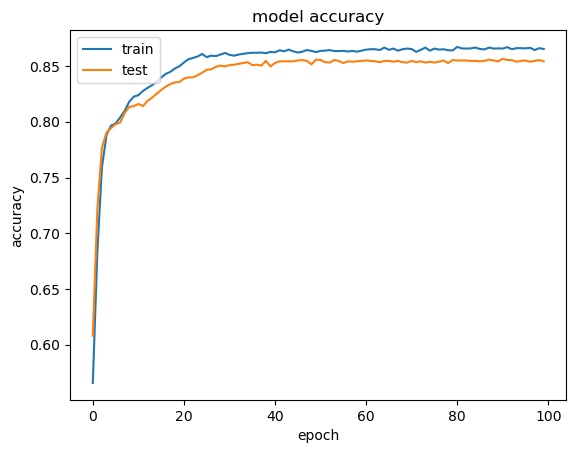

In [19]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

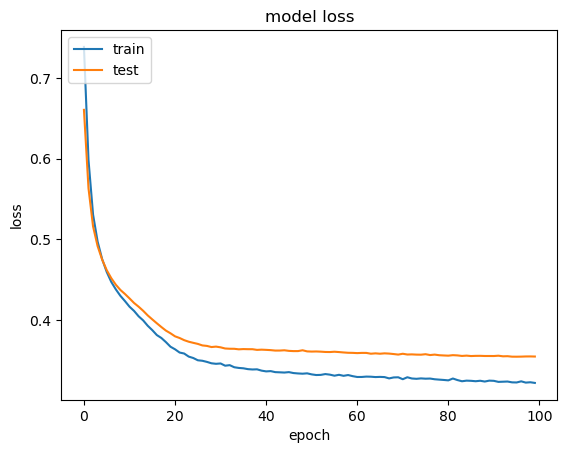

In [20]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[1500,   95],
       [ 194,  211]], dtype=int64)

In [25]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [26]:
score

0.8555

## Now Using Keras Tuner

In [27]:
X_train.shape

(8000, 11)

In [28]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=600,
                                            step=64),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [29]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn')

Reloading Tuner from project1\Churn\tuner0.json


In [30]:
tuner.search_space_summary()

Search space summary
Default search space size: 30
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 600, 'step': 64, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 600, 'step': 64, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 600, 'step': 64, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 600, 'step': 64, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 600, 'step': 64, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 600, 'step': 64, 'sampling': 'linear'}
units_6

In [31]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.8586666584014893

Best val_accuracy So Far: 0.8638333280881246
Total elapsed time: 00h 08m 50s


In [32]:
tuner.results_summary()


Results summary
Results in project1\Churn
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 29
units_0: 288
units_1: 288
learning_rate: 0.0001
units_2: 224
units_3: 224
units_4: 96
units_5: 352
units_6: 288
units_7: 160
units_8: 544
units_9: 224
units_10: 352
units_11: 32
units_12: 416
units_13: 480
units_14: 352
units_15: 416
units_16: 96
units_17: 96
units_18: 352
units_19: 480
units_20: 416
units_21: 288
units_22: 224
units_23: 32
units_24: 32
units_25: 224
units_26: 224
units_27: 96
units_28: 32
Score: 0.8638333280881246

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 480
units_1: 160
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.862333337465922

Trial 1 summary
Hyperparameters:
num_layers: 28
units_0: 32
units_1: 96
learning_rate: 0.001
units_2: 160
units_3: 544
units_4: 224
units_5: 32
units_6: 160
units_7: 544
units_8: 224
units_9: 32
u

In [33]:
'''
Trial 2 summary
Hyperparameters:
num_layers: 29
units_0: 288
units_1: 288
learning_rate: 0.0001
units_2: 224
units_3: 224
units_4: 96
units_5: 352
units_6: 288
units_7: 160
units_8: 544
units_9: 224
units_10: 352
units_11: 32
units_12: 416
units_13: 480
units_14: 352
units_15: 416
units_16: 96
units_17: 96
units_18: 352
units_19: 480
units_20: 416
units_21: 288
units_22: 224
units_23: 32
units_24: 32
units_25: 224
units_26: 224
units_27: 96
units_28: 32
Score: 0.8638333280881246

'''

'\nHyperparameters:\nnum_layers: 5\nunits_0: 416\nunits_1: 480\nlearning_rate: 0.0001\nunits_2: 416\nunits_3: 96\nunits_4: 160\nunits_5: 352\nunits_6: 480\nunits_7: 480\nunits_8: 288\nunits_9: 224\nunits_10: 32\nunits_11: 32\nunits_12: 288\nunits_13: 288\nunits_14: 96\nunits_15: 288\nunits_16: 32\nScore: 0.8648333152135214\n'

## Conclusion
First we created our own model and we got 85% accuracy. Our purpose was to get top 10 layers based on it's accuracy so we can use only best layers to train our model. The reason I trained manualy first model is just to show you the difference between simple model creation and by using keras tuner what we can achieve. The min value,max value,learning rate,step size is depends on you and it's experimental thing. So from the above hyperperameter tuning we can extand our score to 0.8638 (However we can improve that as well by doing more experiments) and we can use that during actual model creation instead of wasting time to train and check again and again.